# Non-Stationary Multi-Armed Bandit Problem using Epsilon-Greedy Algorithm#
# Author: Abhinav Indarapu
This notebook demonstrates solving a non-stationary multi-armed bandit problem using the epsilon-greedy algorithm with a forgetting mechanism.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Initialize parameters
n_arms = 10
epsilon = 0.1
alpha = 0.1
decay_factor = 0.99
n_steps = 1000

In [5]:
# Initialize variables
q_values = np.zeros(n_arms)
arm_counts = np.zeros(n_arms)
rewards = np.zeros(n_steps)

In [7]:
# Simulated true reward values for each arm (non-stationary)
true_rewards = np.random.normal(0, 1, n_arms)

# Function to select an arm based on epsilon-greedy strategy
def select_arm(q_values, epsilon):
  if np.random.rand() < epsilon:
    return np.random.randint(len(q_values))
  else:
    return np.argmax(q_values)

In [8]:
# Main loop
for step in range(n_steps):
  chosen_arm = select_arm(q_values, epsilon)
  reward = np.random.normal(true_rewards[chosen_arm], 1)
  arm_counts[chosen_arm] += 1
  rewards[step] = reward
  q_values[chosen_arm] = q_values[chosen_arm] * (1 - alpha) + reward * alpha
  q_values *= decay_factor
  true_rewards += np.random.normal(0, 0.01, n_arms)

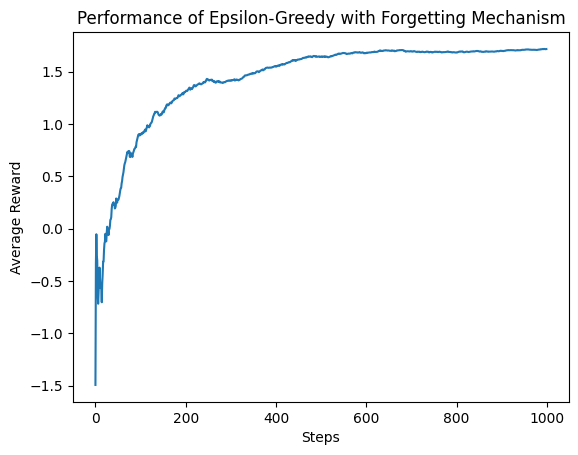

In [9]:
# Plotting the rewards
plt.plot(np.cumsum(rewards) / np.arange(1, n_steps + 1))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Performance of Epsilon-Greedy with Forgetting Mechanism')
plt.show()